In [3]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd


df = pd.read_csv("../../dataset/DM_data.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  int64  
 2   service                      25192 non-null  int64  
 3   flag                         25192 non-null  int64  
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   hot                          25192 non-null  int64  
 9   num_failed_logins            25192 non-null  int64  
 10  logged_in                    25192 non-null  int64  
 11  num_compromised              25192 non-null  int64  
 12  root_shell                   25192 non-null  int64  
 13  su_attempted    

In [4]:
X, y = df.drop(columns=["class", "index_num"]), df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20153 entries, 0 to 20152
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     20153 non-null  int64  
 1   protocol_type                20153 non-null  int64  
 2   service                      20153 non-null  int64  
 3   flag                         20153 non-null  int64  
 4   src_bytes                    20153 non-null  int64  
 5   dst_bytes                    20153 non-null  int64  
 6   land                         20153 non-null  int64  
 7   wrong_fragment               20153 non-null  int64  
 8   hot                          20153 non-null  int64  
 9   num_failed_logins            20153 non-null  int64  
 10  logged_in                    20153 non-null  int64  
 11  num_compromised              20153 non-null  int64  
 12  root_shell                   20153 non-null  int64  
 13  su_attempted    

In [5]:
print(f"Shape of X_train: {X_train.shape}\nShape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}\nShape of y_test: {y_test.shape}")

Shape of X_train: (20153, 38)
Shape of X_test: (5039, 38)
Shape of y_train: (20153,)
Shape of y_test: (5039,)


In [6]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=20, random_state=0)

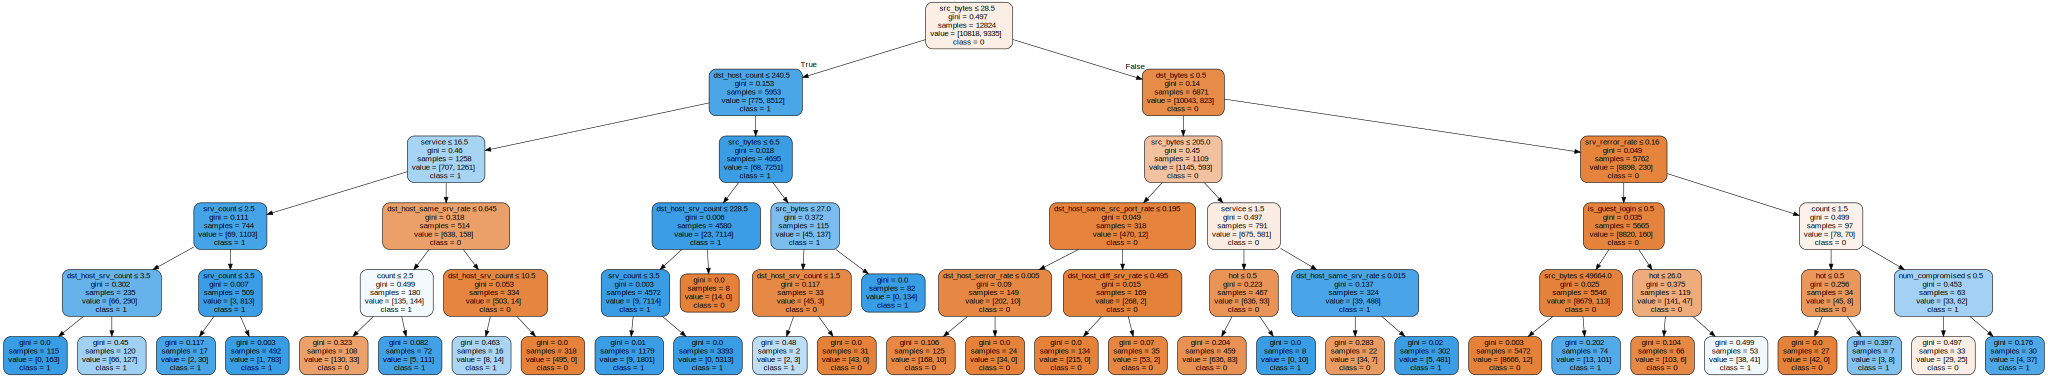

In [7]:
from IPython import display
import graphviz
import os

os.environ["PATH"] += os.pathsep + 'C:\\Users\\s\\anaconda3\\pkgs\\graphviz-2.38-hfd603c8_2\\Library\\bin\\graphviz' 
# 시각화
dot_data1 = tree.export_graphviz(clf.estimators_[5],
                               out_file = None,
                               feature_names = X_train.columns,
                               class_names = ["0", "1"],
                               filled = True,
                               rounded = True,
                               special_characters = True)
graph = graphviz.Source(dot_data1)
graph

In [8]:
from sklearn.metrics import precision_recall_fscore_support

clf_y_pred = clf.predict(X_test)

precision_recall_fscore_support(y_test, clf_y_pred, average="binary")

(0.9974059662775616, 0.9754756871035941, 0.9863189397178281, None)

In [9]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test ,clf_y_pred)

0.9872990672752531

In [10]:
clf_vector = list()

for m_depth_iter in range(1, 21):
    clf_item = RandomForestClassifier(n_estimators=20, max_depth=m_depth_iter, random_state=0, criterion='entropy')
    clf_item.fit(X_train, y_train)
    clf_vector.append(clf_item)

In [11]:
for clf_item in clf_vector:
    clf_y_pred = clf_item.predict(X_test)

    p, r, f, _ = precision_recall_fscore_support(y_test, clf_y_pred, average="binary")
    print(f"depth: {clf_item.max_depth}  {p} {r} {f}")

depth: 1  0.9866186309830159 0.810570824524313 0.8899721448467967
depth: 2  0.9861751152073732 0.904862579281184 0.9437706725468578
depth: 3  0.9902998236331569 0.9496828752642706 0.9695661558385495
depth: 4  0.9969365426695842 0.9632135306553912 0.9797849462365591
depth: 5  0.9978326831382748 0.9733615221987315 0.9854452054794521
depth: 6  0.9991379310344828 0.9801268498942918 0.9895410885805763
depth: 7  0.9978687127024722 0.9898520084566597 0.993844194438548
depth: 8  0.9987261146496815 0.9945031712473573 0.9966101694915255
depth: 9  0.9978768577494692 0.9936575052854123 0.9957627118644068
depth: 10  0.9983050847457627 0.9961945031712474 0.9972486772486773
depth: 11  0.9978840457046128 0.9970401691331924 0.9974619289340102
depth: 12  0.9987293519695044 0.9970401691331924 0.9978840457046128
depth: 13  0.9974630021141649 0.9974630021141649 0.9974630021141649
depth: 14  0.9978867286559594 0.99830866807611 0.9980976537729866
depth: 15  0.9978813559322034 0.9957716701902748 0.99682539682

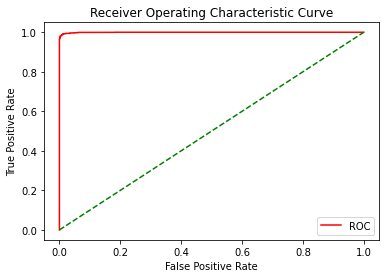

In [13]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    

prob = clf.predict_proba(X_test)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)
plot_roc_curve(fper, tper)